In [6]:
import pandas as pd

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]
df.head()

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


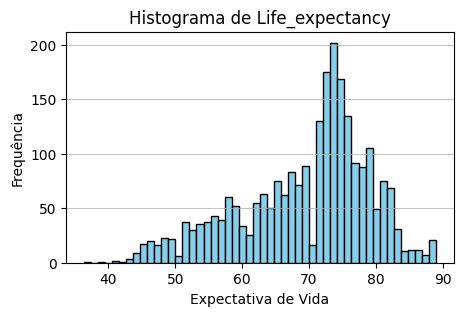

Média de Life_expectancy: 69.46
Variância de Life_expectancy: 92.92


In [27]:
# 2 - Considerando a base anterior, construa um histograma para a variável
# Life_expectancy. Qual a média e variância desse atributo?

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.hist(df['Life_expectancy'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de Life_expectancy')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

media = df['Life_expectancy'].mean()
variancia = df['Life_expectancy'].var()
print(f"Média de Life_expectancy: {media:.2f}")
print(f"Variância de Life_expectancy: {variancia:.2f}")

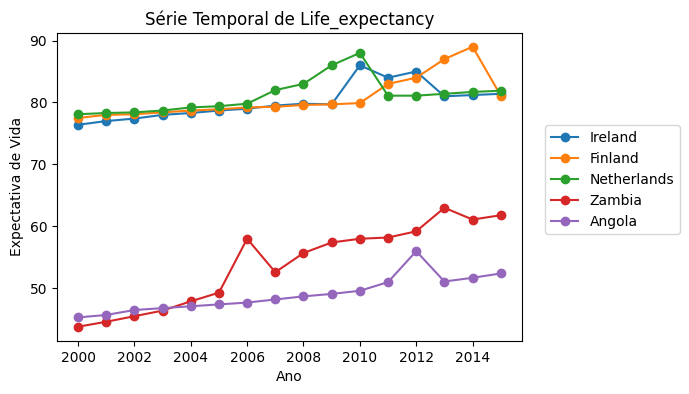

Maior expectativa de vida em 2014: Belgium com 89.00 anos
Menor expectativa de vida em 2014: Sierra Leone com 48.10 anos


In [15]:
# 3 - Mostre a série temporal da variável Life_Expectancy para os países: Ireland, Finland,
# Netherlands, Zambia, Angola. Os países com maior e menor expectativas de vida em
# 2014 são:

countries_of_interest = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df_filtered = df[df['Country'].isin(countries_of_interest)]

plt.figure(figsize=(6, 4))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life_expectancy'], marker='o', label=country)

plt.title('Série Temporal de Life_expectancy')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.legend(bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0.)
plt.grid(False)
plt.show()

df_2014 = df[df['Year'] == 2014]
max_life_expectancy = df_2014['Life_expectancy'].max()
min_life_expectancy = df_2014['Life_expectancy'].min()
country_max = df_2014[df_2014['Life_expectancy'] == max_life_expectancy]['Country'].values[0]
country_min = df_2014[df_2014['Life_expectancy'] == min_life_expectancy]['Country'].values[0]
print(f"Maior expectativa de vida em 2014: {country_max} com {max_life_expectancy:.2f} anos")
print(f"Menor expectativa de vida em 2014: {country_min} com {min_life_expectancy:.2f} anos")

<Figure size 400x400 with 0 Axes>

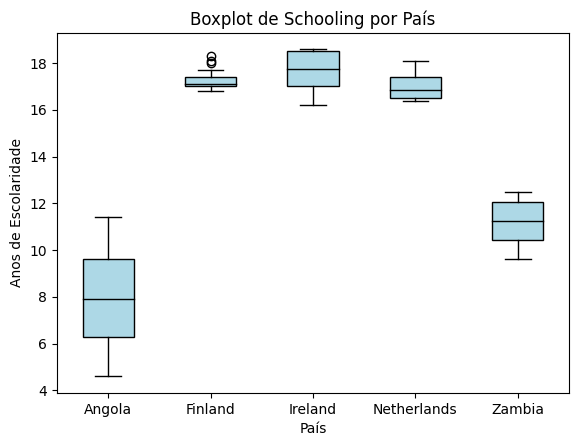

País com maior nível de escolaridade em termos de mediana: Ireland com 17.75 anos


In [28]:
# 4 - Faça um boxplot para a variável Schooling. Considere os países: 'Ireland', 'Finland',
# 'Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior
# nível de escolaridade?

countries_of_interest = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df_filtered = df[df['Country'].isin(countries_of_interest)]

plt.figure(figsize=(4, 4))
df_filtered.boxplot(column='Schooling', by='Country', grid=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='black'))

plt.title('Boxplot de Schooling por País')
plt.suptitle('')
plt.xlabel('País')
plt.ylabel('Anos de Escolaridade')
plt.show()

medianas = df_filtered.groupby('Country')['Schooling'].median()
pais_maior_median = medianas.idxmax()
maior_median = medianas.max()
print(f"País com maior nível de escolaridade em termos de mediana: {pais_maior_median} com {maior_median:.2f} anos")

In [29]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/world-population/population-by-country/"
# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})
# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]
# Print the DataFrame
df.head()

<ipython-input-29-6bfe3e868c29>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %


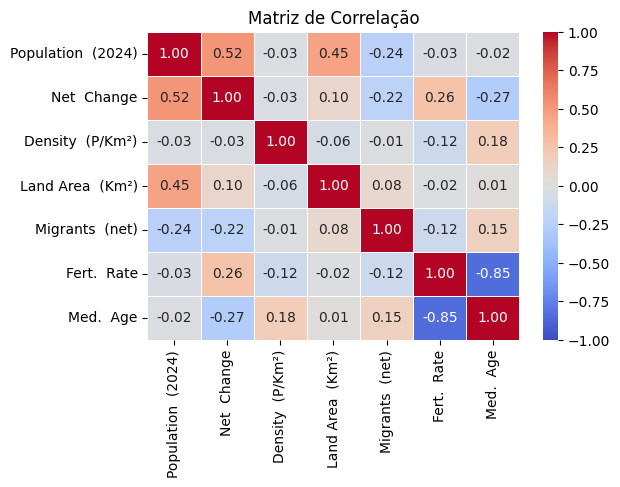

-------------------------------------------------------------------------
0.9 para mais ou -0.9 para menos indica uma correlação muito forte.
0.7 a 0.9 positivo ou negativo indica uma correlação forte.
0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
-------------------------------------------------------------------------
Variáveis pouco correlacionadas:
Population  (2024) - Density  (P/Km²)
Population  (2024) - Land Area  (Km²)
Population  (2024) - Migrants  (net)
Population  (2024) - Fert.  Rate
Population  (2024) - Med.  Age
Net  Change - Density  (P/Km²)
Net  Change - Land Area  (Km²)
Net  Change - Migrants  (net)
Net  Change - Fert.  Rate
Net  Change - Med.  Age
Density  (P/Km²) - Land Area  (Km²)
Density  (P/Km²) - Migrants  (net)
Density  (P/Km²) - Fert.  Rate
Density  (P/Km²) - Med.  Age
Land Area  (Km²) - Migrants  (net)
Land Area  (Km²) - Fert.  Rate
Land Area  (Km²) - Med.  Age
Migrants  (net) - Fert.

In [41]:
# Construa a matriz de correlação. Quais as variáveis menos correlacionadas?

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.drop(df.columns[0], axis=1)

numeric_df = df2.select_dtypes(include=['number']) # seleciona apenas as colunas numericas
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

print('-------------------------------------------------------------------------')
print('0.9 para mais ou -0.9 para menos indica uma correlação muito forte.')
print('0.7 a 0.9 positivo ou negativo indica uma correlação forte.')
print('0.5 a 0.7 positivo ou negativo indica uma correlação moderada.')
print('0.3 a 0.5 positivo ou negativo indica uma correlação fraca.')
print('-------------------------------------------------------------------------')

# Extrair a matriz triangular inferior (sem a diagonal) para encontrar as correlações mais fortes
corr_upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
filtered_correlations = corr_upper[
    ((corr_upper >= 0) & (corr_upper <= 0.5)) |
    ((corr_upper <= 0) & (corr_upper >= -0.5))
]
variable_pairs = filtered_correlations.stack().index
print("Variáveis pouco correlacionadas:")
for var1, var2 in variable_pairs:
    print(f"{var1} - {var2}")